In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import scipy as sc
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as sm

In [2]:
p_i = [0.001, 0.003, 0.005, 0.01, 0.01, 0.011, 0.02, 0.15, 0.3]
#p_i = [0.00017, 0.00448, 0.00671, 0.00907, 0.01220, 0.33626, 0.39341, 0.53882, 0.58125, 0.98617]

In [3]:
print(p_i)
print([0.05 * i / 9 for i in range(1, 10)])

[0.001, 0.003, 0.005, 0.01, 0.01, 0.011, 0.02, 0.15, 0.3]
[0.005555555555555556, 0.011111111111111112, 0.01666666666666667, 0.022222222222222223, 0.027777777777777776, 0.03333333333333334, 0.03888888888888889, 0.044444444444444446, 0.05]


In [4]:
C_k = sum([1 / i for i in range(1, 10)])
#C_k = 1
print(C_k)
l_i = [i * 0.05 / (9 * C_k) for i in range(1, 10)]
R = 0
for i in range(9):
    if p_i[i] < l_i[i]:
        R = i
R = R + 1
P = p_i[R]
D_1 = []
for i in range(9):
    if p_i[i] < P:
        D_1.append(p_i[i])
print(R, P, l_i, len(D_1), D_1, sep='\n')

2.8289682539682537
6
0.02
[0.00196380979099453, 0.00392761958198906, 0.00589142937298359, 0.00785523916397812, 0.009819048954972648, 0.01178285874596718, 0.01374666853696171, 0.01571047832795624, 0.01767428811895077]
6
[0.001, 0.003, 0.005, 0.01, 0.01, 0.011]


In [5]:
C_k = 1
l_i = [i * 0.05 / (9 * C_k) for i in range(1, 10)]
R = 0
for i in range(9):
    if p_i[i] < l_i[i]:
        R = i
P = p_i[R]
D_1 = []
for i in range(9):
    if p_i[i] < P:
        D_1.append(p_i[i])
print(R, P, l_i, len(D_1), D_1, sep='\n')

6
0.02
[0.005555555555555556, 0.011111111111111112, 0.01666666666666667, 0.022222222222222223, 0.027777777777777776, 0.03333333333333334, 0.03888888888888889, 0.044444444444444446, 0.05]
6
[0.001, 0.003, 0.005, 0.01, 0.01, 0.011]


C:\Users\timo2\AppData\Local\Temp\ipykernel_5664\2557237733.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Y)


<AxesSubplot:ylabel='Density'>

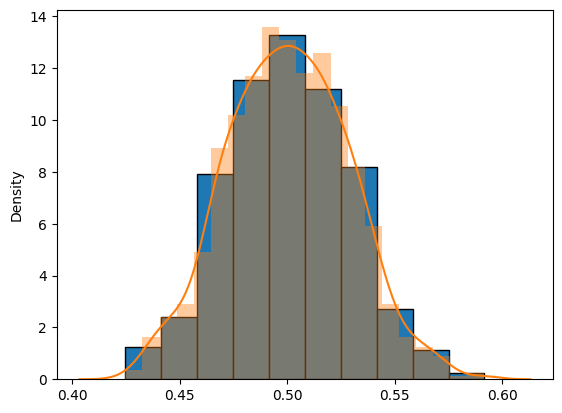

In [6]:
Y = 0
for i in range(100):
    X1 = np.random.uniform(0, 1, 1000)
    Y = Y + X1
Y = Y / 100
plt.hist(Y, edgecolor='black', density=True)
sb.distplot(Y)

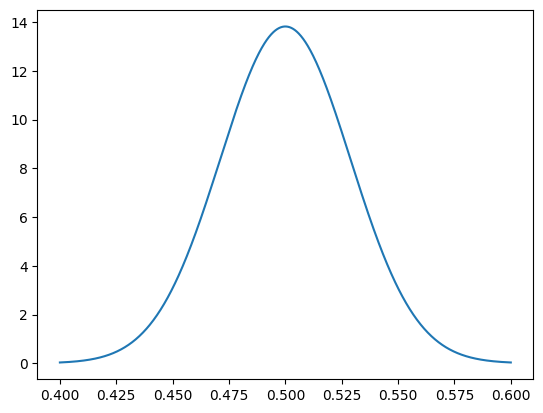

In [7]:
x_data = np.linspace(0.4, 0.6, 1000)
y_data = [st.norm.pdf(x, loc=0.5, scale=np.sqrt(1/12/100)) for x in x_data]
plt.plot(x_data, y_data)

In [8]:
z_un = 1 - st.norm.cdf(2/3, loc=0.5, scale=np.sqrt(1/12/2))
print(z_un)
z_norm = 1 - st.norm.cdf(2/3, loc=1, scale=np.sqrt(1/2))
print(z_norm)

0.20710808912126266
0.6813240558830315


In [9]:
Integr = 0
n_i = 100
X_i = np.random.uniform(-1, 1, n_i)
ecdf = ECDF(X_i)

In [10]:
def F_F(x):
    return (ecdf(x) - st.norm.cdf(x, loc=0, scale=1))**2 / (st.norm.cdf(x, loc=0, scale=1) * (1 - st.norm.cdf(x, loc=0, scale=1)))

In [11]:
x_data = np.linspace(-10, 10, 1000)
y_data = [F_F(x) for x in x_data]

C:\Users\timo2\AppData\Local\Temp\ipykernel_5664\2491837997.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (ecdf(x) - st.norm.cdf(x, loc=0, scale=1))**2 / (st.norm.cdf(x, loc=0, scale=1) * (1 - st.norm.cdf(x, loc=0, scale=1)))


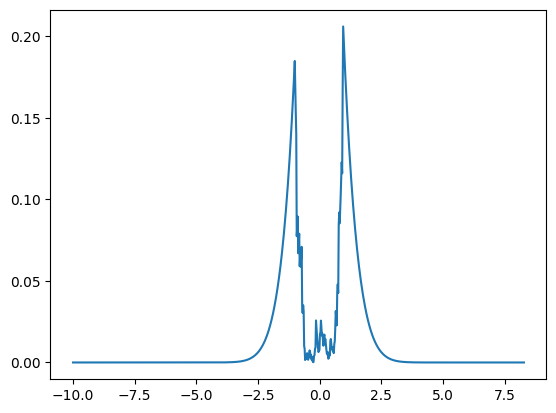

In [12]:
plt.plot(x_data, y_data)

Power_divergenceResult(statistic=157.57754205557785, pvalue=2.365514343336598e-29)
Power_divergenceResult(statistic=397.823738844863, pvalue=1.7728657826356168e-78)


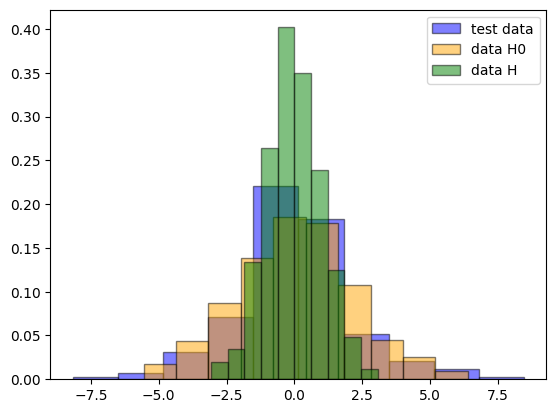

In [13]:
sz = 1000
sz_exp = 1000
#x_data = np.random.normal(9, 5, sz)
x_data = np.random.laplace(0, 1.5, sz)

mu_ = np.mean(x_data)
sigma_ = np.mean((x_data - mu_)**2)
exp_data_0 = np.random.normal(mu_, np.sqrt(sigma_), sz_exp)
exp_data_1 = np.random.normal(0, 1, sz_exp)

delta = [-1.5, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.5]
#Полученные частоты
f_obs = []
count = 0
for x in x_data:
        if x < delta[0]:
            count += 1
f_obs.append(count) 
for i in range(len(delta) - 1):
    count = 0
    for x in x_data:
        if x >= delta[i] and x < delta[i + 1]:
            count += 1
    f_obs.append(count)
count = 0
for x in x_data:
        if x >= delta[-1]:
            count += 1
f_obs.append(count) 

#Ожидаемые частоты при гипотезе H0
f_exp_0 = []
count = 0
for x in exp_data_0:
        if x < delta[0]:
            count += 1
f_exp_0.append(count) 
for i in range(len(delta) - 1):
    count = 0
    for x in exp_data_0:
        if x >= delta[i] and x < delta[i + 1]:
            count += 1
    f_exp_0.append(count)
count = 0
for x in exp_data_0:
        if x >= delta[-1]:
            count += 1
f_exp_0.append(count) 
f_exp_0 = [f * sz / sz_exp for f in f_exp_0]

#Ожидаемые частоты при гипотезе H
f_exp_1 = []
count = 0
for x in exp_data_1:
        if x < delta[0]:
            count += 1
f_exp_1.append(count) 
for i in range(len(delta) - 1):
    count = 0
    for x in exp_data_1:
        if x >= delta[i] and x < delta[i + 1]:
            count += 1
    f_exp_1.append(count)
count = 0
for x in exp_data_1:
        if x >= delta[-1]:
            count += 1
f_exp_1.append(count) 
f_exp_1 = [f * sz / sz_exp for f in f_exp_1]

ch_0 = st.chisquare(f_obs, f_exp_0, ddof=2)
ch_1 = st.chisquare(f_obs, f_exp_1, ddof=0)

print(ch_0, ch_1, sep='\n')

plt.hist(x_data, edgecolor='black', color="blue", label="test data", alpha=0.5, density=True)
plt.hist(exp_data_0, edgecolor='black', color="orange", label="data H0", alpha=0.5, density=True)
plt.hist(exp_data_1, edgecolor='black', color="green", label="data H", alpha=0.5,density=True)
plt.legend()

In [14]:
x_data = np.random.normal(1, 1, 25)
print(np.mean(x_data))

1.0684679797793595


**<h1>1.1<h1>**


In [15]:
def Func(k):
    return np.log10(1 + 1 / k)

In [16]:
w_benf = []
for i in range(1, 10):
    w_benf.append(Func(i))
print(w_benf)

[0.3010299956639812, 0.17609125905568124, 0.12493873660829993, 0.09691001300805642, 0.07918124604762482, 0.06694678963061322, 0.05799194697768673, 0.05115252244738129, 0.04575749056067514]


**Countries**

In [17]:
X_countries = []
with open("Countries.csv") as f:
    lines = f.readlines()
for line in lines:
    x = line.split(';')[2]
    if x != "Население":
        x = x.split()
        X_countries.append(x[0][0])
print(X_countries)

['1', '1', '3', '2', '2', '1', '1', '1', '1', '1', '1', '9', '8', '8', '8', '8', '7', '7', '6', '6', '6', '6', '5', '5', '5', '5', '4', '4', '4', '4', '4', '4', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '9', '9', '9', '9', '9', '8', '8', '8', '8', '7', '7', '7', '7', '6', '6', '6', '6', '6', '6', '6', '6', '5', '5', '5', '5', '5', '5', '5', '5', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '8', '8', '8', '8', '7', '7', '7', '7', '6', '5', '5', '5', '5', '5', '4', '4', '4', '4', '3', '3', '3', '3', '3', '2', '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '9', '9',

In [18]:
X_c = []
for x in X_countries:
    X_c.append(int(x))

w_c = [X_c.count(i) / len(X_c) for i in range(1, 10)]

p_value_c = st.chisquare([w * len(X_c) for w in w_c], [w * len(X_c) for w in w_benf])
print(p_value_c)

Power_divergenceResult(statistic=4.527386386956672, pvalue=0.8066869718908759)


In [19]:
p_value_ = st.chisquare([1, 100, 1, 100, 1, 100, 1, 100, 1], [w*sum([1, 100, 1, 100, 1, 100, 1, 100, 1])  for w in w_benf])
print(p_value_)

Power_divergenceResult(statistic=841.6825724591976, pvalue=2.129388791553362e-176)


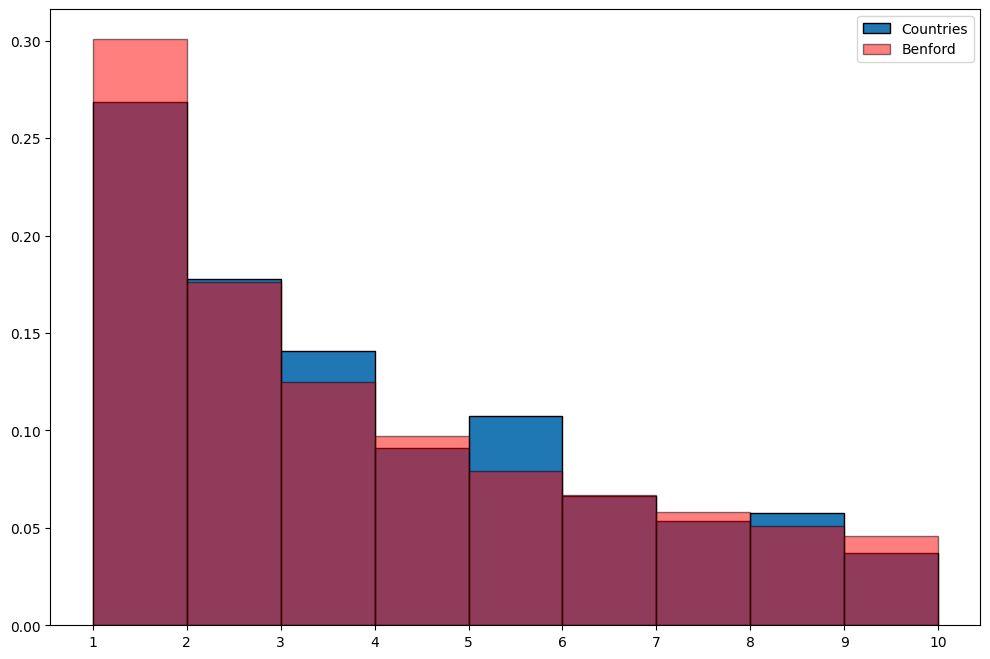

In [20]:
plt.figure(figsize=(12,8))
plt.hist([i for i in range(1, 10)], weights=w_c, edgecolor='black', bins=[i for i in range(1, 11)], label="Countries")
plt.hist([i for i in range(1, 10)], weights=w_benf, edgecolor='black', color='red', alpha = 0.5, bins=[i for i in range(1, 11)], label="Benford")
plt.xticks([i for i in range(1, 11)])
plt.legend()

**Fibonacci**

In [21]:
def Fib(n, arr):
    if n == 0:
        arr.append(0)
    elif n == 1:
        arr.append(1)
    else:
        arr.append(arr[n - 1] + arr[n - 2])

In [22]:
X_fib = []
for i in range(1000):
    Fib(i, X_fib)

X_fib_num = []
for x in X_fib:
    x_num = int(str(x)[0])
    if x_num > 0:
        X_fib_num.append(int(str(x)[0]))

w_fib = [X_fib_num.count(i) / len(X_fib_num) for i in range(1, 10)]

p_value_fib = st.chisquare([w * len(X_fib) for w in w_fib], [w * len(X_fib) for w in w_benf])
print(p_value_fib)

Power_divergenceResult(statistic=0.19795756218159408, pvalue=0.9999963049062339)


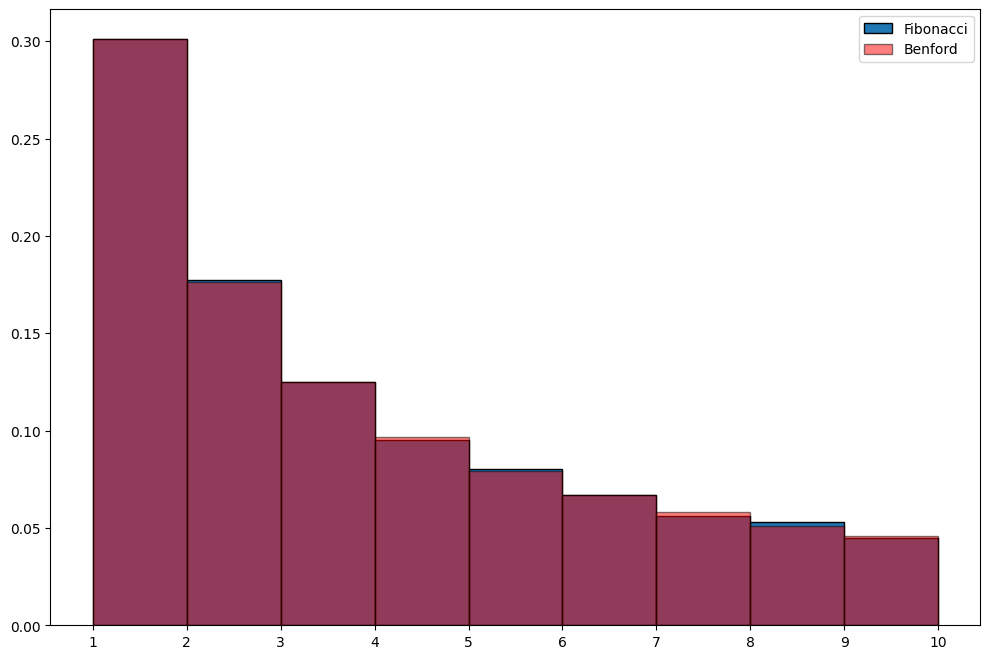

In [23]:
plt.figure(figsize=(12,8))
plt.hist([i for i in range(1, 10)], weights=w_fib, edgecolor='black', bins=[i for i in range(1, 11)], label="Fibonacci")
plt.hist([i for i in range(1, 10)], weights=w_benf, edgecolor='black', color='red', alpha = 0.5, bins=[i for i in range(1, 11)], label="Benford")
plt.xticks([i for i in range(1, 11)])
plt.legend()

**Weather - mintemp**

In [24]:
X_weather = pd.read_csv("weather.csv")
X_weather["mintemp"]
X_w = []
for x in X_weather["mintemp"]:
    if str(abs(x))[0] != 'n':
        x_w = int(abs(x))
        x_w = str(x_w)
        if len(x_w) == 2:
            if x_w[0] == '2' and x_w[1] != '0':
                X_w.append(int(x_w[1]))
#print(X_w)
w_w = [X_w.count(i) / len(X_w) for i in range(1, 10)]

p_value_w = st.chisquare([w * len(X_w) for w in w_w], [w * len(X_w) for w in w_benf])
print(p_value_w)

Power_divergenceResult(statistic=1196.1362970124826, pvalue=6.555176264159122e-253)


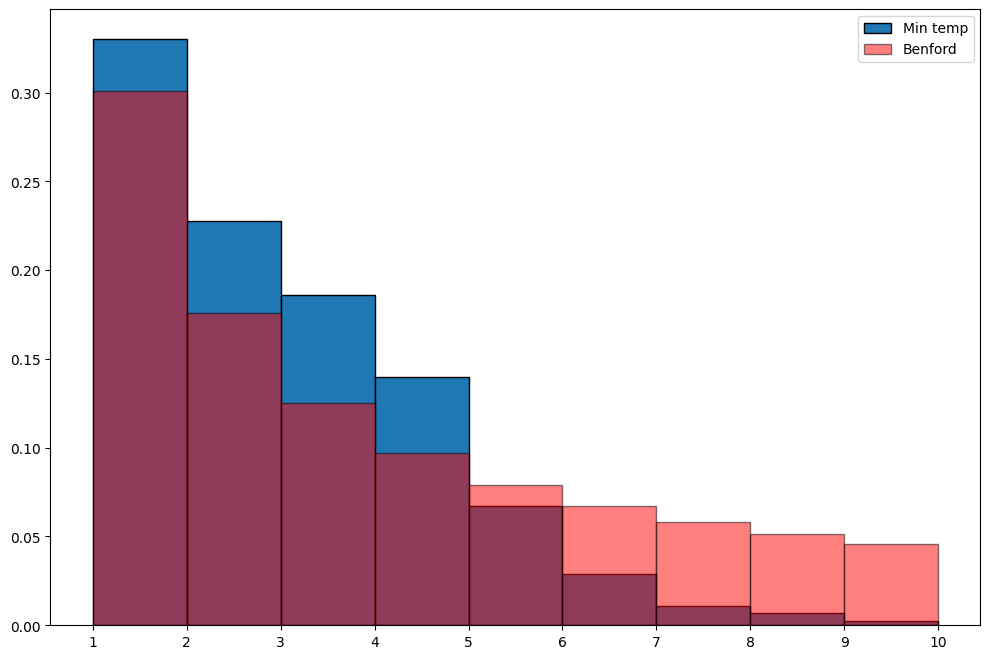

In [25]:
plt.figure(figsize=(12,8))
plt.hist([i for i in range(1, 10)], weights=w_w, edgecolor='black', bins=[i for i in range(1, 11)], label="Min temp")
plt.hist([i for i in range(1, 10)], weights=w_benf, edgecolor='black', color='red', alpha = 0.5, bins=[i for i in range(1, 11)], label="Benford")
plt.xticks([i for i in range(1, 11)])
plt.legend()

**<h1>1.2<h1>**


In [26]:
data = []
with open("Rainfall.txt") as f:
    lines = f.readlines()
for line in lines:
    if line != "Rainfall\n":
        data.append(float(line))
print(data)

[146.8, 383.0, 90.9, 178.1, 267.5, 95.5, 156.5, 180.0, 90.9, 139.7, 200.2, 171.7, 187.2, 184.9, 70.1, 58.0, 84.1, 55.6, 133.1, 271.8, 135.9, 71.9, 99.4, 110.6, 47.5, 97.8, 122.7, 58.4, 154.4, 173.7, 118.8, 88.0, 84.6, 171.5, 254.3, 185.9, 137.2, 138.9, 96.2, 85.0, 45.2, 74.7, 264.9, 113.8, 133.4, 68.1, 156.4]


(array([0.00566872, 0.00692844, 0.00566872, 0.00566872, 0.00251943,
        0.        , 0.00251943, 0.        , 0.        , 0.00062986]),
 array([ 45.2 ,  78.98, 112.76, 146.54, 180.32, 214.1 , 247.88, 281.66,
        315.44, 349.22, 383.  ]),
 <BarContainer object of 10 artists>)

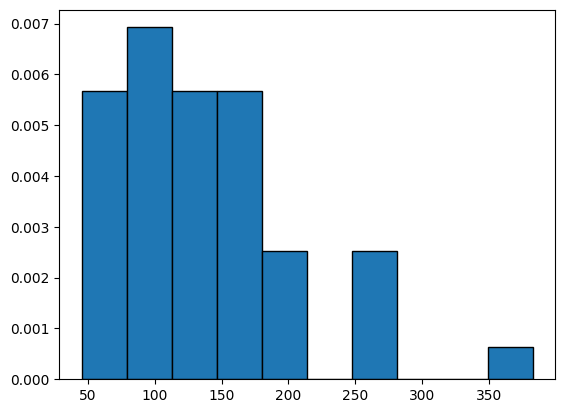

In [27]:
plt.hist(data, edgecolor='black', density=True)

**Exp**

In [28]:
ad = st.anderson(data, "expon")
print(ad)

AndersonResult(statistic=6.19343418343302, critical_values=array([0.91 , 1.064, 1.324, 1.586, 1.932]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [29]:
mle_exp = 1 / np.mean(data)
e_loc, e_scale = st.expon.fit(data)
print("lambda", mle_exp, "mle scale", 1 / mle_exp)
print("loc", e_loc,"scale", e_scale)

lambda 0.007304034313420776 mle scale 136.9106382978723
loc 45.2 scale 91.71063829787231


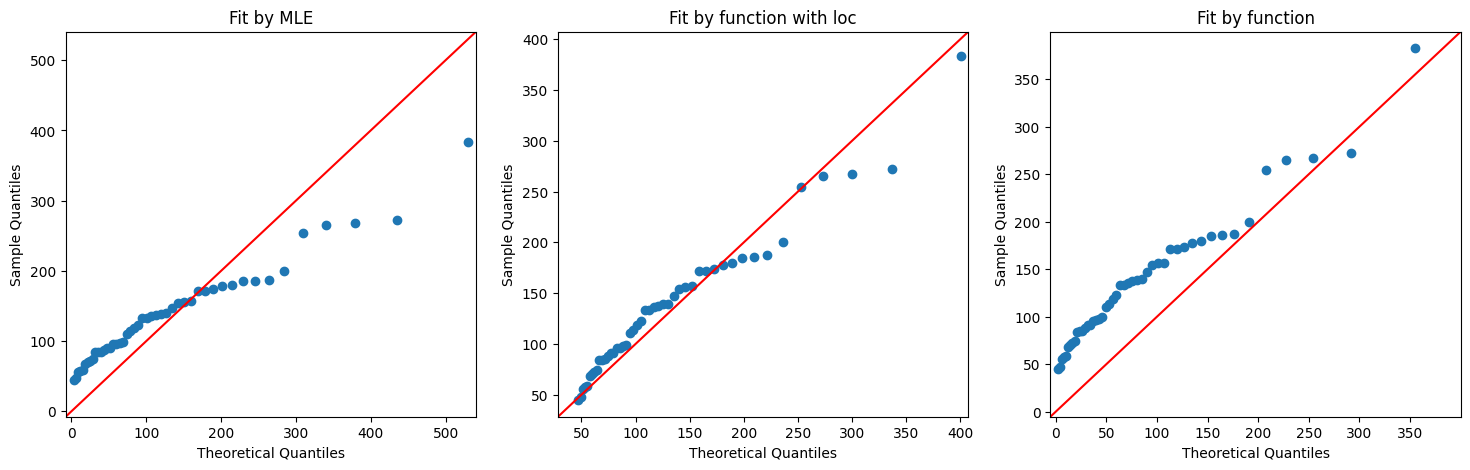

In [30]:
fig, ax = plt.subplots(1, 3, figsize = (18, 5))
sm.qqplot(np.array(data), st.expon(scale=1/mle_exp), fit=False, line="45", ax=ax[0])
ax[0].set_title("Fit by MLE")
sm.qqplot(np.array(data), st.expon(loc=e_loc, scale=e_scale), fit=False, line="45", ax=ax[1])
ax[1].set_title("Fit by function with loc")
sm.qqplot(np.array(data), st.expon(loc=0, scale=e_scale), fit=False, line="45", ax=ax[2])
ax[2].set_title("Fit by function")
plt.show()

Text(0.5, 1.0, 'Fit by Function')

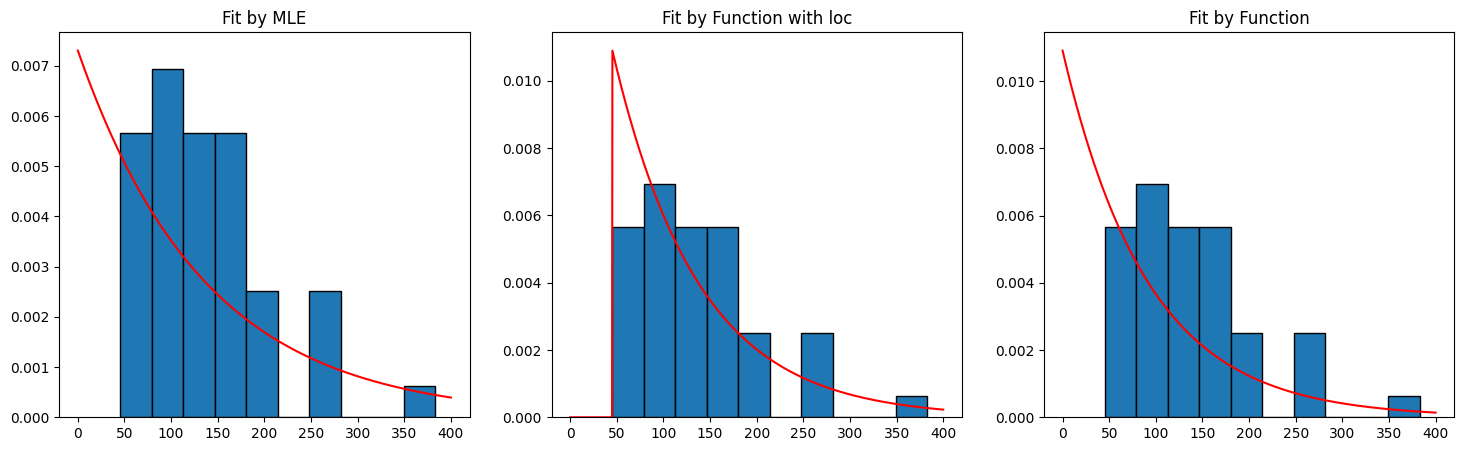

In [31]:
X = np.linspace(0, 400, 1000)
Y = st.expon.pdf(X, scale=1 / mle_exp)
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].hist(data, edgecolor='black', density=True)
ax[0].plot(X, Y, color='red')
ax[0].set_title("Fit by MLE")
Y = st.expon.pdf(X,loc=e_loc, scale=e_scale)
ax[1].hist(data, edgecolor='black', density=True)
ax[1].plot(X, Y, color='red')
ax[1].set_title("Fit by Function with loc")
Y = st.expon.pdf(X,loc=0, scale=e_scale)
ax[2].hist(data, edgecolor='black', density=True)
ax[2].plot(X, Y, color='red')
ax[2].set_title("Fit by Function")

**Lognorm**

In [32]:
ln_data = [np.log(x) for x in data]

(array([ 3.,  3.,  6.,  7.,  4., 10.,  9.,  0.,  4.,  1.]),
 array([3.81109709, 4.02479088, 4.23848467, 4.45217846, 4.66587225,
        4.87956604, 5.09325983, 5.30695362, 5.52064741, 5.7343412 ,
        5.94803499]),
 <BarContainer object of 10 artists>)

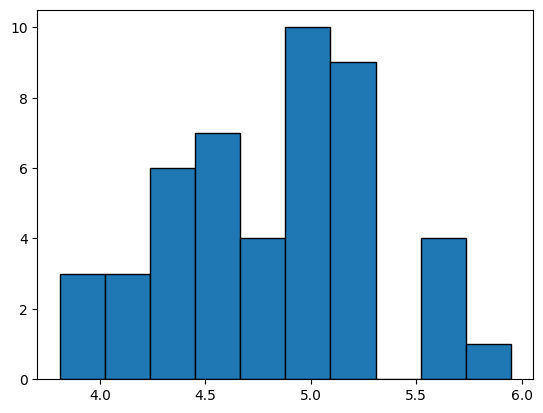

In [33]:
plt.hist(ln_data, edgecolor='black')

In [34]:
ad = st.anderson(ln_data, "norm")
sp = st.shapiro(ln_data)
print(ad, sp, sep='\n')

AndersonResult(statistic=0.2340437438149081, critical_values=array([0.536, 0.611, 0.733, 0.855, 1.017]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
ShapiroResult(statistic=0.9857742786407471, pvalue=0.8307797908782959)


In [35]:
mle_m = np.mean(ln_data)
mle_s = np.mean((ln_data - mle_m)**2)
n_loc, n_scale = st.norm.fit(ln_data)
print("mle loc", mle_m, "mle scale", np.sqrt(mle_s))
print("loc", n_loc,"scale", n_scale)

mle loc 4.802271854849704 mle scale 0.4857380756164556
loc 4.802271854849704 scale 0.4857380756164556


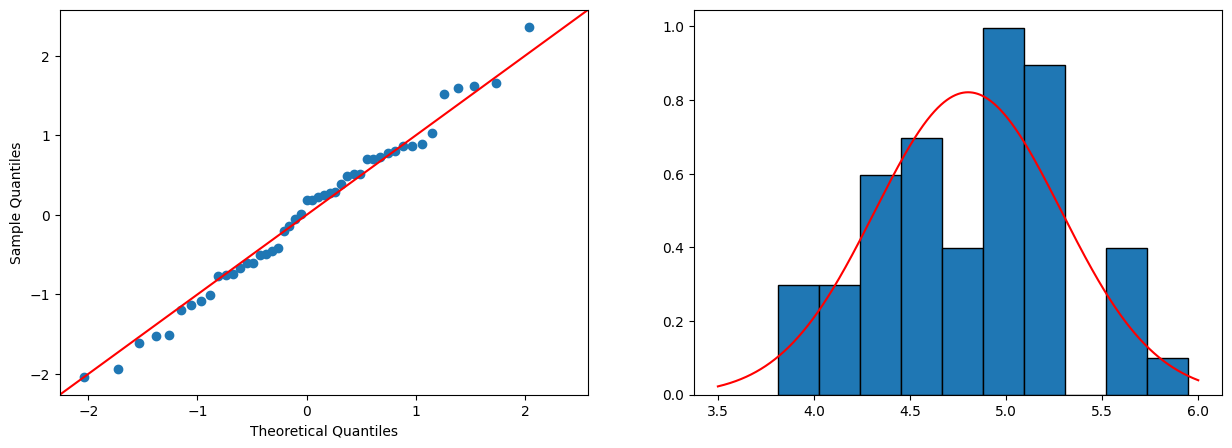

In [36]:
X = np.linspace(3.5, 6, 1000)
Y = st.norm.pdf(X, loc=mle_m, scale=np.sqrt(mle_s))
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sm.qqplot(np.array(ln_data), st.norm, fit=True, line="45", ax=ax[0])
ax[1].hist(ln_data, edgecolor='black', density=True)
ax[1].plot(X, Y, color='red')
plt.show()

**<h1>1.3<h1>**

In [37]:
data = []
with open("shoshoni.txt") as f:
    lines = f.readlines()
for line in lines:
    if line != "Ratio\n":
        data.append(float(line))
print(data)

[0.693, 0.662, 0.69, 0.606, 0.57, 0.749, 0.672, 0.628, 0.609, 0.844, 0.654, 0.615, 0.668, 0.601, 0.576, 0.67, 0.606, 0.611, 0.553, 0.933]


(array([3., 7., 2., 5., 0., 1., 0., 1., 0., 1.]),
 array([0.553, 0.591, 0.629, 0.667, 0.705, 0.743, 0.781, 0.819, 0.857,
        0.895, 0.933]),
 <BarContainer object of 10 artists>)

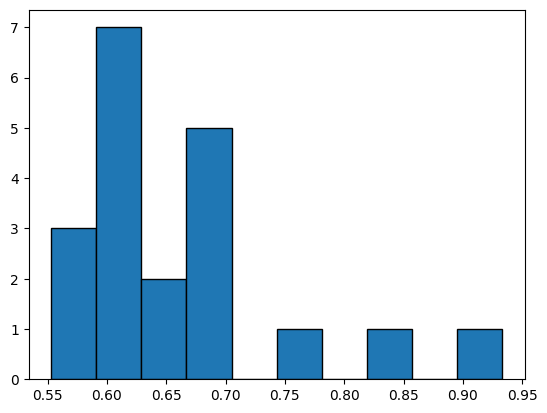

In [38]:
plt.hist(data, edgecolor='black')

**Exp**

In [39]:
ad = st.anderson(data, "expon")
print(ad)

AndersonResult(statistic=7.215561749677441, critical_values=array([0.895, 1.047, 1.302, 1.559, 1.9  ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [40]:
mle_exp = 1 / np.mean(data)
e_loc, e_scale = st.expon.fit(data)
print("lambda", mle_exp, "mle scale", 1 / mle_exp)
print("loc", e_loc,"scale", e_scale)

lambda 1.5140045420136259 mle scale 0.6605000000000001
loc 0.553 scale 0.10750000000000004


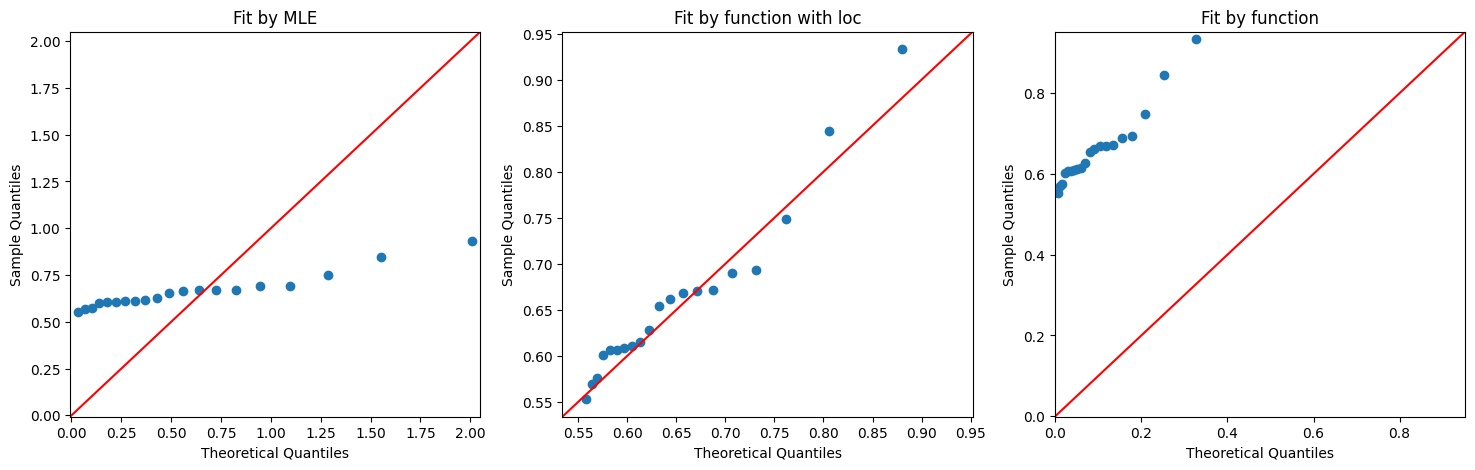

In [41]:
fig, ax = plt.subplots(1, 3, figsize = (18, 5))
sm.qqplot(np.array(data), st.expon(scale=1/mle_exp), fit=False, line="45", ax=ax[0])
ax[0].set_title("Fit by MLE")
sm.qqplot(np.array(data), st.expon(loc=e_loc, scale=e_scale), fit=False, line="45", ax=ax[1])
ax[1].set_title("Fit by function with loc")
sm.qqplot(np.array(data), st.expon(loc=0, scale=e_scale), fit=False, line="45", ax=ax[2])
ax[2].set_title("Fit by function")
plt.show()

Text(0.5, 1.0, 'Fit by Function')

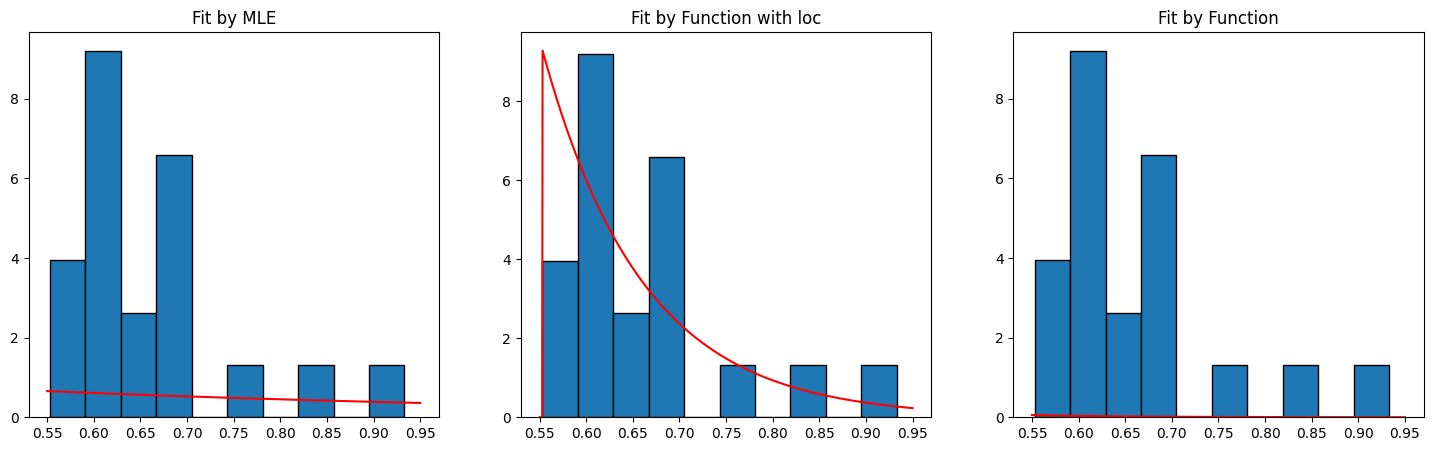

In [42]:
X = np.linspace(0.55, 0.95, 1000)
Y = st.expon.pdf(X, scale=1 / mle_exp)
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].hist(data, edgecolor='black', density=True)
ax[0].plot(X, Y, color='red')
ax[0].set_title("Fit by MLE")
Y = st.expon.pdf(X,loc=e_loc, scale=e_scale)
ax[1].hist(data, edgecolor='black', density=True)
ax[1].plot(X, Y, color='red')
ax[1].set_title("Fit by Function with loc")
Y = st.expon.pdf(X,loc=0, scale=e_scale)
ax[2].hist(data, edgecolor='black', density=True)
ax[2].plot(X, Y, color='red')
ax[2].set_title("Fit by Function")

**Norm**

In [43]:
ad = st.anderson(data, "norm")
sp = st.shapiro(data)
print(ad, sp, sep='\n')

AndersonResult(statistic=1.1861629825504885, critical_values=array([0.506, 0.577, 0.692, 0.807, 0.96 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
ShapiroResult(statistic=0.8284037113189697, pvalue=0.0023661439772695303)


In [44]:
mle_m = np.mean(data)
mle_s = np.mean((data - mle_m)**2)
n_loc, n_scale = st.norm.fit(data)
print("mle loc", mle_m, "mle scale", np.sqrt(mle_s))
print("loc", n_loc,"scale", n_scale)

mle loc 0.6605000000000001 mle scale 0.09016845346350352
loc 0.6605000000000001 scale 0.09016845346350352


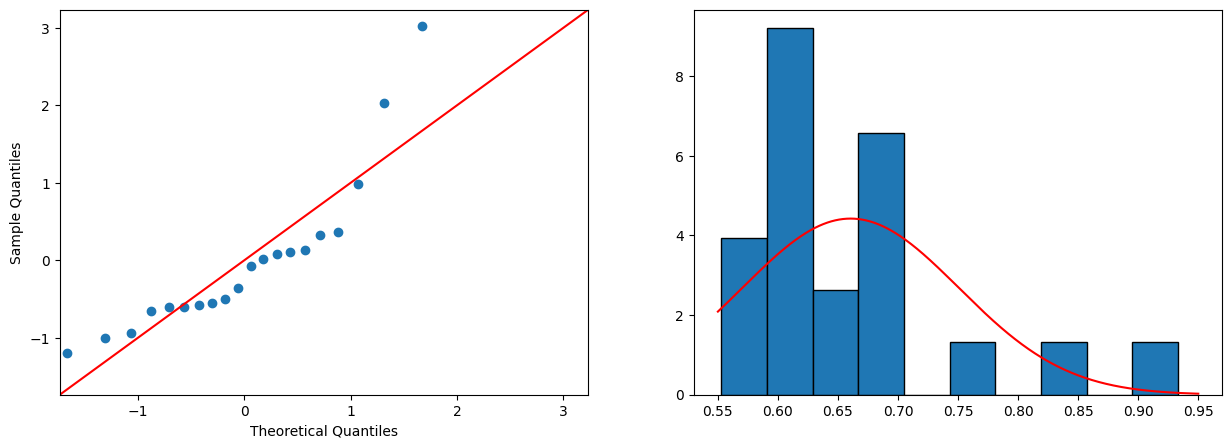

In [45]:
X = np.linspace(0.55, 0.95, 1000)
Y = st.norm.pdf(X, loc=mle_m, scale=np.sqrt(mle_s))
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sm.qqplot(np.array(data), st.norm, fit=True, line="45", ax=ax[0])
ax[1].hist(data, edgecolor='black', density=True)
ax[1].plot(X, Y, color='red')
plt.show()

**Lognorm**

In [46]:
ln_data = [np.log(x) for x in data]

(array([3., 5., 2., 5., 2., 1., 0., 0., 1., 1.]),
 array([-0.59239728, -0.54009256, -0.48778784, -0.43548312, -0.3831784 ,
        -0.33087368, -0.27856896, -0.22626424, -0.17395952, -0.1216548 ,
        -0.06935008]),
 <BarContainer object of 10 artists>)

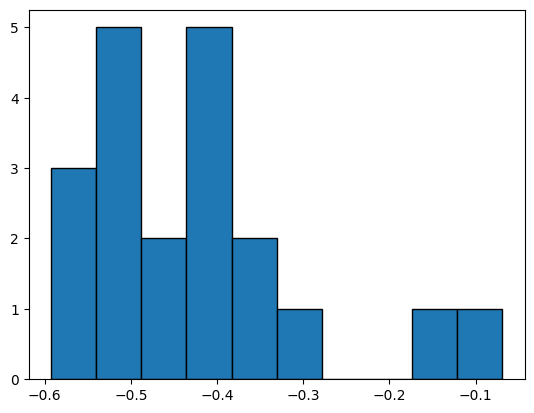

In [47]:
plt.hist(ln_data, edgecolor='black')

In [48]:
ad = st.anderson(ln_data, "norm")
sp = st.shapiro(ln_data)
print(ad, sp, sep='\n')

AndersonResult(statistic=0.8478154097944568, critical_values=array([0.506, 0.577, 0.692, 0.807, 0.96 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
ShapiroResult(statistic=0.8792201280593872, pvalue=0.017130687832832336)


In [49]:
mle_ln_m = np.mean(ln_data)
mle_ln_s = np.mean((ln_data - mle_ln_m)**2)
n_loc, n_scale = st.norm.fit(ln_data)
print("mle loc", mle_ln_m, "mle scale", np.sqrt(mle_ln_s))
print("loc", n_loc,"scale", n_scale)

mle loc -0.42306777895925657 mle scale 0.12546692680693577
loc -0.42306777895925657 scale 0.12546692680693577


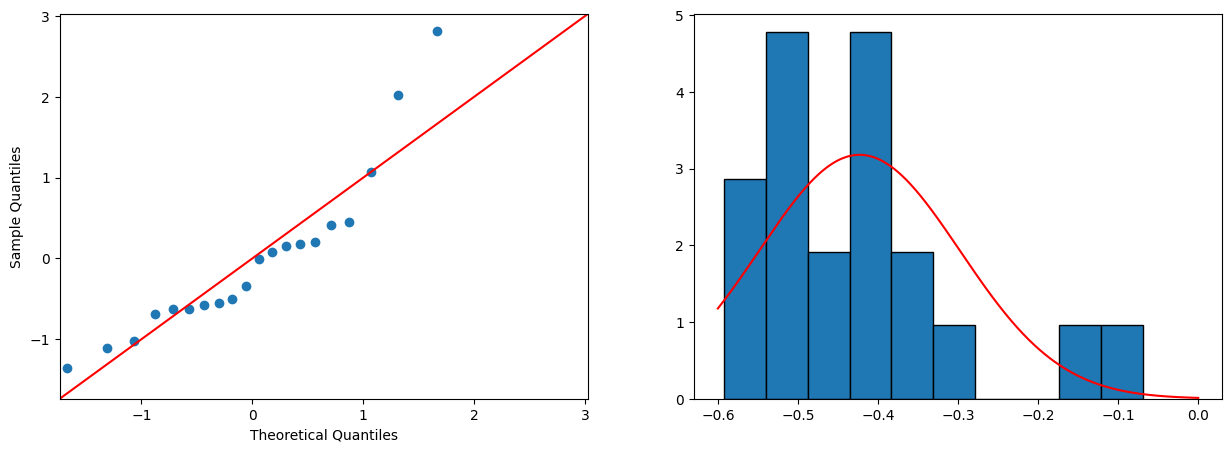

In [50]:
X = np.linspace(-0.6, 0, 1000)
Y = st.norm.pdf(X, loc=mle_ln_m, scale=np.sqrt(mle_ln_s))
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sm.qqplot(np.array(ln_data), st.norm, fit=True, line="45", ax=ax[0])
ax[1].hist(ln_data, edgecolor='black', density=True)
ax[1].plot(X, Y, color='red')
plt.show()

In [51]:
gs = (np.sqrt(5) + 1) / 2
print(gs)

1.618033988749895


In [52]:
print(mle_m)

0.6605000000000001


In [53]:
ttest = st.ttest_1samp(a=data, popmean=gs)
print(ttest)

Ttest_1sampResult(statistic=-46.28884861217658, pvalue=5.324381189796942e-21)


----

In [54]:
np.mean(data)

0.6605000000000001

In [55]:
print(mle_m, mle_s)

0.6605000000000001 0.008130350000000001


In [56]:
mean_ = np.exp(mle_m + mle_s/2)
sigma_ = (np.exp(mle_s) - 1) * np.exp(2*mle_m + mle_s)
print(mean_, sigma_)

1.9436451920443647 0.030839682461940365


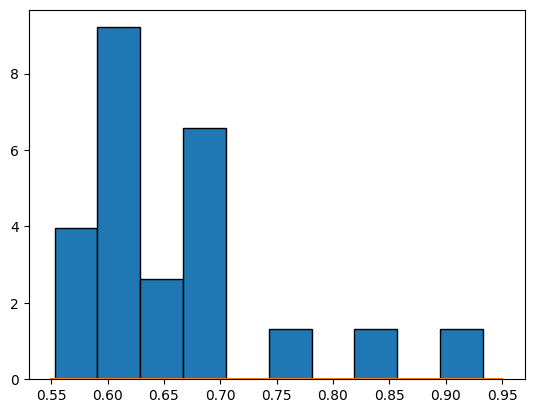

In [57]:
x_d = np.linspace(0.55, 0.95)
y_d = st.lognorm.pdf(x_d, s=np.sqrt(mle_s), loc=mle_m)
plt.hist(data, edgecolor="black", density=True)
plt.plot(x_d, y_d)

$\frac{a}{b} = \frac{a + b}{a} \\
\frac{a}{b} = 1 + \frac{b}{a} \\
\overline{X} = 1 + \frac{1}{\overline{X}} \\ 
T = 1 + \frac{1}{\overline{X}}$

In [58]:
print(min(data), np.mean(data), max(data))

0.553 0.6605000000000001 0.933


In [59]:
mean_ = np.exp(mle_m + mle_s/2)
sigma_ = (np.exp(mle_s) - 1) * np.exp(2*mle_m + mle_s)
print(mean_, sigma_)

1.9436451920443647 0.030839682461940365


In [60]:
print((max(data) - min(data)) / (max(data) - np.mean(data)))
print((max(data) - np.mean(data)) / (np.mean(data) - min(data)))

1.394495412844037
2.5348837209302313


In [61]:
mn = np.mean(data)
print(mn**2 - mn - 1)
print((1.618)**2 - 1.618 - 1)

-1.22423975
-7.599999999974294e-05


In [62]:
C = st.norm.ppf(0.95, loc=mean_, scale=np.sqrt(sigma_) / len(data))
print(C)

1.9580880190712389


In [63]:
T = 1 + 1 / np.mean(data)
print(T)

2.514004542013626
